In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

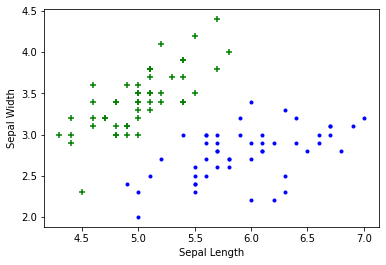

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

**Petal length vs Pepal Width (Setosa vs Versicolor)**

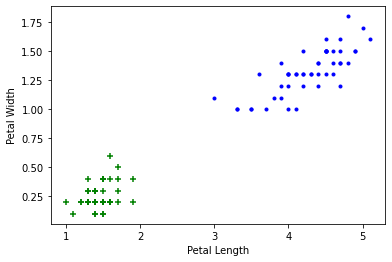

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

**Train Using Support Vector Machine (SVM)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train)

120

In [ ]:
len(X_test)

30

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test, y_test)

0.9666666666666667

**Tune parameters**

**1. Regularization (C)**

In [ ]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [ ]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

**2. Gamma**

In [ ]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

**3. Kernel**

In [ ]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
model_linear_kernal.score(X_test, y_test)

1.0

**Exercise**

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

# Train an SVM classifier using a radial basis function kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Predict the test set using the SVM classifier with the RBF kernel
y_pred_rbf = svm_rbf.predict(X_test)

# Measure the accuracy of the SVM classifier with the RBF kernel
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF kernel: {acc_rbf:.4f}")

# Train an SVM classifier using a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Predict the test set using the SVM classifier with the linear kernel
y_pred_linear = svm_linear.predict(X_test)

# Measure the accuracy of the SVM classifier with the linear kernel
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with linear kernel: {acc_linear:.4f}")


Accuracy with RBF kernel: 0.9861
Accuracy with linear kernel: 0.9722


In [ ]:
# Define a list of regularization parameter values to try
C_values = [0.01, 0.1, 1, 10, 100]

# Define a list of gamma parameter values to try
gamma_values = [0.01, 0.1, 1, 10, 100]

best_acc = 0
best_C = None
best_gamma = None

# Loop over the regularization and gamma parameter values
for C in C_values:
    for gamma in gamma_values:
        
        # Train an SVM classifier with the current parameter values
        svm = SVC(kernel='rbf', C=C, gamma=gamma)
        svm.fit(X_train, y_train)
        
        # Predict the test set using the SVM classifier with the current parameter values
        y_pred = svm.predict(X_test)
        
        # Measure the accuracy of the SVM classifier with the current parameter values
        acc = accuracy_score(y_test, y_pred)
        
        # Check if this is the best accuracy so far
        if acc > best_acc:
            best_acc = acc
            best_C = C
            best_gamma = gamma
            
# Print the best accuracy and the corresponding parameter values
print(f"Best accuracy: {best_acc:.4f}")
print(f"Best C: {best_C}")
print(f"Best gamma: {best_gamma}")


Best accuracy: 0.8028
Best C: 10
Best gamma: 0.01


In [ ]:
import pandas as pd

import numpy as np

import sklearn

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

import seaborn as sns


In [ ]:
digits=load_digits()

print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
df=pd.DataFrame(digits.data)

print(df.head())

print(df.shape)

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
(1797, 64)


In [ ]:
df.columns

RangeIndex(start=0, stop=64, step=1)

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [ ]:
df['target']=digits.target

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
print(digits.data.shape)

print(digits.target.shape)

(1797, 64)
(1797,)


In [ ]:
df.target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [ ]:
df.values

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  9.,  0.,  2.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  8.],
       [ 0.,  0.,  2., ...,  0.,  0.,  9.],
       [ 0.,  0., 10., ...,  1.,  0.,  8.]])

In [ ]:
from sklearn.model_selection import train_test_split

x=df.drop(['target'],axis='columns')

y=df.target

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=12)

In [ ]:
print(len(x_train))

print(len(x_test))

1437
360


In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

model1=SVC(kernel='rbf',random_state=0, probability=True)

model1.fit(x_train,y_train)

y_pred_1=model1.predict(x_test)

print("Model Score of Kernal(rbf) :", model1.score(x_test,y_test))


Model Score of Kernal(rbf) : 0.9916666666666667


In [ ]:
model2=SVC(kernel='linear',random_state=0, probability=True)

model2.fit(x_train,y_train)

y_pred_2=model2.predict(x_test)

print("Model Score of Kernal(linear) :", model2.score(x_test,y_test))

Model Score of Kernal(linear) : 0.975


In [ ]:
model3=SVC(kernel='poly',random_state=0, probability=True)

model3.fit(x_train,y_train)

y_pred_3=model3.predict(x_test)

print("Model Score of Kernal(poly) :", model3.score(x_test,y_test))

Model Score of Kernal(poly) : 0.9944444444444445


In [ ]:
accuracy=accuracy_score(y_test,y_pred_3)

print('ACCURACY is',accuracy)

ACCURACY is 0.9944444444444445


In [ ]:
from sklearn.metrics import confusion_matrix

cm=np.array(confusion_matrix(y_test,y_pred_3))

cm


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]])

In [ ]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred_3)

mse


0.08888888888888889

In [ ]:
model1_C=SVC(C=3)

model1_C.fit(x_train,y_train)

model1_C.score(x_test,y_test)

0.9944444444444445

In [ ]:
model2_C=SVC(C=3)

model2_C.fit(x_train,y_train)

model2_C.score(x_test,y_test)


0.9944444444444445

In [ ]:
model3_C=SVC(C=3)

model3_C.fit(x_train,y_train)

model3_C.score(x_test,y_test)

0.9944444444444445

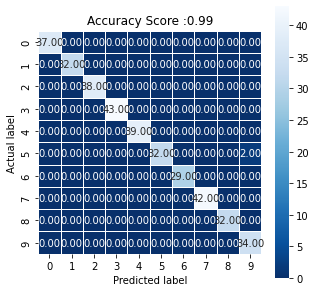

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

A=f'Accuracy Score :{accuracy:.2f}'

plt.title(A)

plt.show()

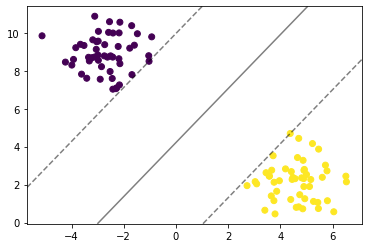

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Generate random data points
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)

# Create a Support Vector Machine object with a linear kernel
svc = SVC(kernel='linear')

# Fit the Support Vector Machine model to the data
svc.fit(X, y)

# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

76.31578947368422


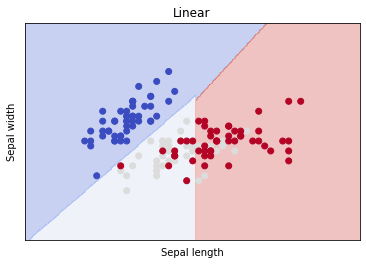

In [ ]:
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data[:, :2] # we only take the first two features
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)

classifier_predictions = clf.predict(x_test)
print(accuracy_score(y_test, classifier_predictions)*100)

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
xx.shape


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("Linear")
plt.show()